In [5]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression   

In [9]:
#Loading the data set 
data=pd.read_csv("D:/Data_ Science/claimants.csv")
data

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [10]:
data1=data.iloc[:,1:]
data1

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [11]:
#shape of the data set 
data1.shape

(1340, 6)

In [12]:
data2=data1.dropna()
data2.shape

(1096, 6)

In [16]:
X=data2.iloc[:,1:]
Y=data2.iloc[:,0]

In [17]:
#Logistic regression and fit the model
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred=classifier.predict(X)

In [33]:
y_pred_df= pd.DataFrame({'actual_Y': Y,
                         'predicted_Y': classifier.predict(X)})

In [34]:
y_pred_df

,actual_Y,predicted_Y
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [36]:
#Confusion matrix to evaluate the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [37]:
#Confusion matrix is used to evaluate the accuracy of a classification
((381+395)/(381+197+123+395))*100

70.8029197080292

In [38]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [40]:
#Classification Report 
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [ ]:
# ROC Curve(receiver operating characteristic curve)
#ROC curves are typically used in binary classification to study the output of a classifier
#The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 
#The true-positive rate is also known as sensitivity, recall or probability of detection.
#The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity).

Text(0, 0.5, 'True positive rate')

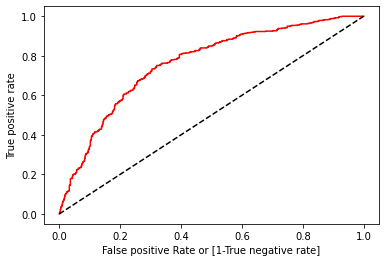

In [53]:
#roc_auc = area under ROC curve 
#auc provides an aggregate measure of performance across all possible classification threshold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1:])

auc=roc_auc_score(Y,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logistic model(area = %0.2f)'%auc )
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive Rate or [1-True negative rate]')
plt.ylabel('True positive rate')